In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
# 数据获取、预处理
digits = datasets.load_digits()
X, y = digits.data, digits.target

print(f"标签类别: {np.unique(y)}")

# 使用数据200
sample_size = min(200, len(X))
X = X[:sample_size]
y = y[:sample_size]
print(f"数据集形状: {X.shape}")

# 37划分数据训练集测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)
print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

标签类别: [0 1 2 3 4 5 6 7 8 9]
数据集形状: (200, 64)
训练集大小: (140, 64)
测试集大小: (60, 64)


In [20]:
# 使用PCA进行特征降维
n_components = min(32, X_train.shape[1])
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"原始特征数: {X_train.shape[1]}")
print(f"降维后特征数: {X_train_pca.shape[1]}")

原始特征数: 64
降维后特征数: 32


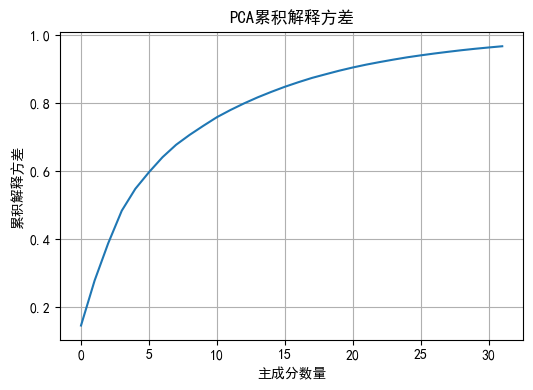

In [21]:
# PCA可视化
plt.figure(figsize=(15, 4))
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(1, 3, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('主成分数量')
plt.ylabel('累积解释方差')
plt.title('PCA累积解释方差')
plt.grid(True)

plt.tight_layout()
plt.show()

使用数据: PCA降维数据
训练模型: SVM
SVM 最佳参数: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM 准确率: 0.9500

SVM 分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         6
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         6
           5       1.00      0.83      0.91         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       0.86      1.00      0.92         6
           9       0.83      0.83      0.83         6

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

使用数据: PCA降维数据
训练模型: DecisionTree
DecisionTree 最佳参数: {'max_depth': 5, 'min_samples_split': 2}
DecisionTree 准确率: 0.7000

DecisionTree 分类报告

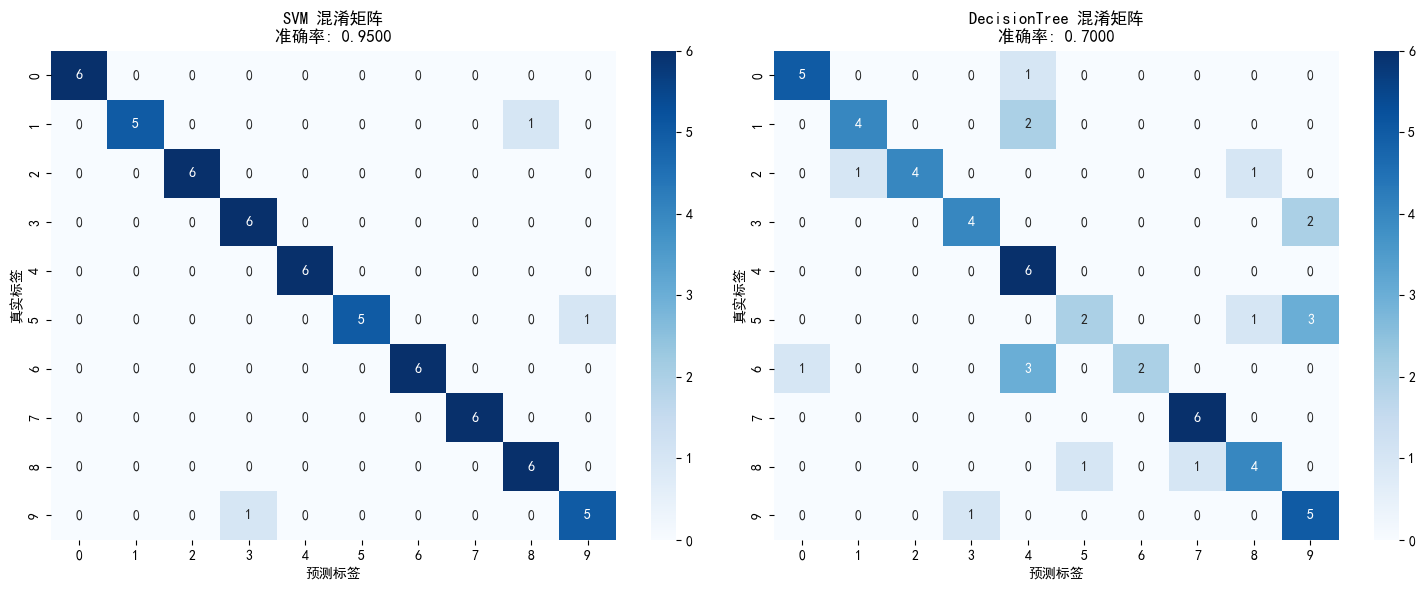

In [35]:
results = {}
for name, model in models.items():
    X_train_model = X_train_pca
    X_test_model = X_test_pca
    data_type = "PCA降维数据"
    print(f"使用数据: {data_type}")
    print(f"训练模型: {name}")
    
    # 参数优化
    grid_search = GridSearchCV(
        model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train_model, y_train)
    
    # 最佳参数
    best_model = grid_search.best_estimator_
    
    # 预测
    y_pred = best_model.predict(X_test_model)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'model': best_model,
        'predictions': y_pred,
        'accuracy': accuracy,
        'best_params': grid_search.best_params_,
        'data_type': data_type,
    }
    
    print(f"{name} 最佳参数: {grid_search.best_params_}")
    print(f"{name} 准确率: {accuracy:.4f}")
    print(f"\n{name} 分类报告:")
    print(classification_report(y_test, y_pred)) 

# 混淆矩阵
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for idx, (name, result) in enumerate(results.items()):
    y_pred = result['predictions']
    cm = confusion_matrix(y_test, y_pred)
    
    # 绘制混淆矩阵
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y), yticklabels=np.unique(y),
                ax=axes[idx])
    axes[idx].set_title(f'{name} 混淆矩阵\n准确率: {result["accuracy"]:.4f}')
    axes[idx].set_xlabel('预测标签')
    axes[idx].set_ylabel('真实标签')

plt.tight_layout()
plt.show()